In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df= pd.read_csv('../data/gdp_percapita.csv')


In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [4]:
gdp_df.shape

(7662, 4)

In [5]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

6.Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [6]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [7]:
gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country', 'Year': 'Year','Value' :'GDP_Per_Capita'})
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [8]:
available_years = gdp_df['Year'].nunique()
available_years

33

In [9]:
countries_with_all_years = gdp_df.groupby('Country')['Year'].nunique()==available_years
countries_with_all_years.sum()


202

In [10]:
missing_data = gdp_df.groupby('Country')['Year'].nunique()
missing_data = missing_data[missing_data<available_years]
missing_data

Country
Afghanistan                  20
Aruba                        32
Bhutan                       32
Bosnia and Herzegovina       29
Cambodia                     30
Cayman Islands               16
Croatia                      28
CuraÃ§ao                     22
Djibouti                     10
Estonia                      28
Hungary                      32
Iceland                      28
Israel                       28
Kosovo                       15
Kuwait                       31
Latvia                       28
Lebanon                      32
Liberia                      23
Libya                        24
Lithuania                    28
Maldives                     28
Moldova                      28
Montenegro                   26
Nauru                        19
Other small states           23
Palau                        22
Qatar                        23
San Marino                   25
Serbia                       28
Sint Maarten (Dutch part)    14
Slovak Republic              31


In [11]:
observations_per_year = gdp_df.Year.value_counts()
observations_per_year

Year
2013    242
2016    242
2014    242
2015    242
2020    242
2017    242
2018    242
2019    242
2021    241
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Name: count, dtype: int64

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [12]:
gdp_df.nunique()

Country            242
Year                33
GDP_Per_Capita    7624
dtype: int64

In [13]:
distribution_per_capita = gdp_df.GDP_Per_Capita.value_counts()
distribution_per_capita

GDP_Per_Capita
2789.229794    2
2719.147209    2
4444.460942    2
4274.116292    2
3898.015933    2
              ..
3523.789387    1
3709.395761    1
4128.560179    1
4402.545952    1
2704.757299    1
Name: count, Length: 7624, dtype: int64

In [14]:
gdp_df.describe()

,Year,GDP_Per_Capita
count,7662.000000,7662.000000
mean,2006.388280,17206.979219
std,9.418727,19363.258695
min,1990.000000,436.376416
25%,1998.000000,3655.268993
50%,2007.000000,10132.449293
75%,2015.000000,24119.515045
max,2022.000000,157602.482546


In [15]:
gdp_per_capita_2020 = gdp_df.loc[gdp_df['Year']==2020]
gdp_per_capita_2020

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


gdp_per_capita_2020['GDP_Per_Capita'].hist(bins = 10,
                            color = '#99FFFF',
                            edgecolor = 'black',
                            figsize = (10,6),
                            grid = False)


plt.title('Distribution of GDP per capita for the year 2020', fontsize = 16);

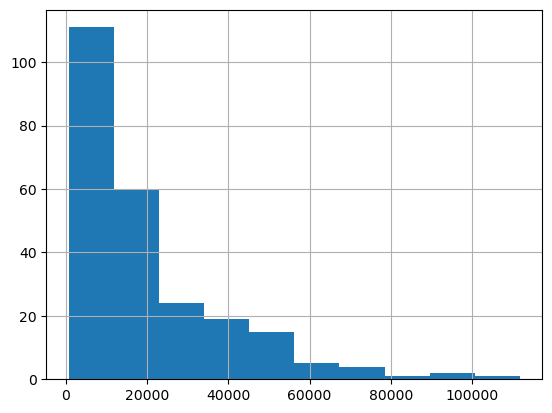

In [16]:
gdp_per_capita_2020['GDP_Per_Capita'].hist();

Density plot

C:\Users\TitanUp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


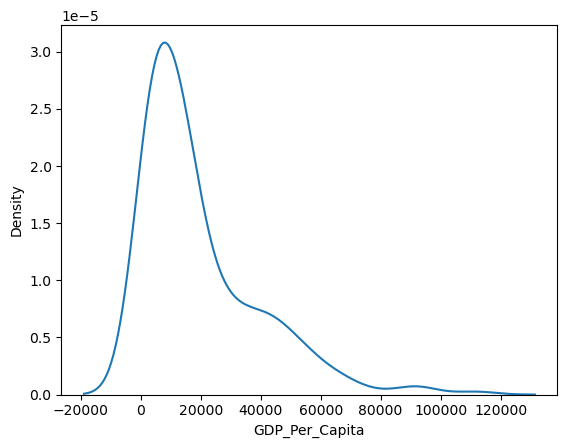

In [17]:
sns.kdeplot(gdp_per_capita_2020['GDP_Per_Capita']);

Boxplot

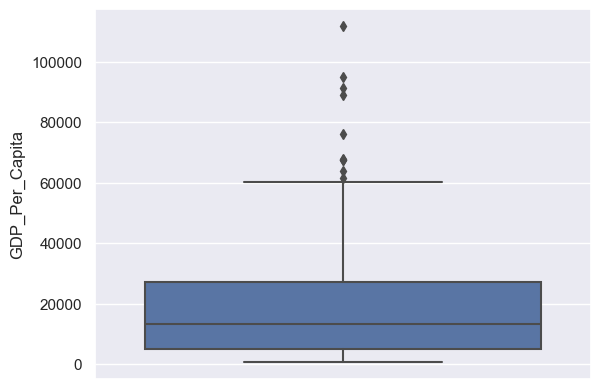

In [18]:
sns.set_theme(style="darkgrid")
sns.boxplot(y=gdp_per_capita_2020["GDP_Per_Capita"])
plt.show()

Violin plot

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

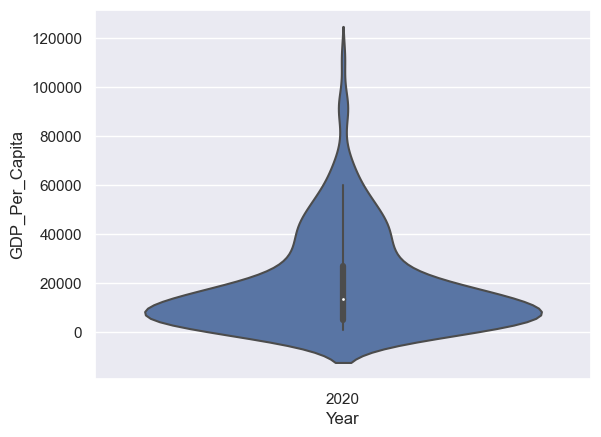

In [19]:

# plot
sns.violinplot(x=gdp_per_capita_2020["Year"], y=gdp_per_capita_2020["GDP_Per_Capita"])

9. What was the median GDP per capita value in 2020?

Max in Year	2022  and GDP_Per_Capita is	157602.482546

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [20]:
my_list = [1990,2000,2010,2020]
gdp_decades = gdp_df.loc[gdp_df.Year.isin(my_list)]
gdp_decades.shape


(921, 3)

In [21]:
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


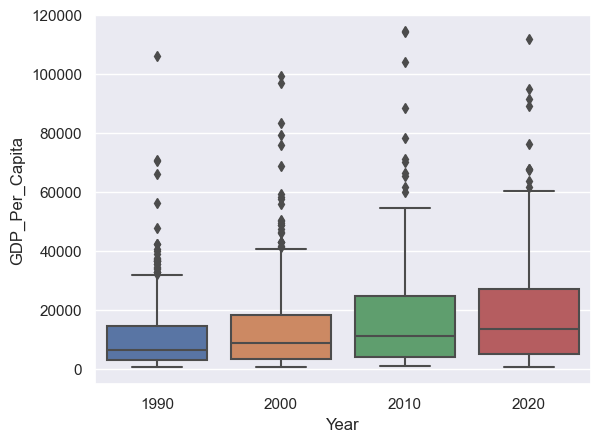

In [22]:
sns.boxplot(data = gdp_decades, y = 'GDP_Per_Capita', x='Year');

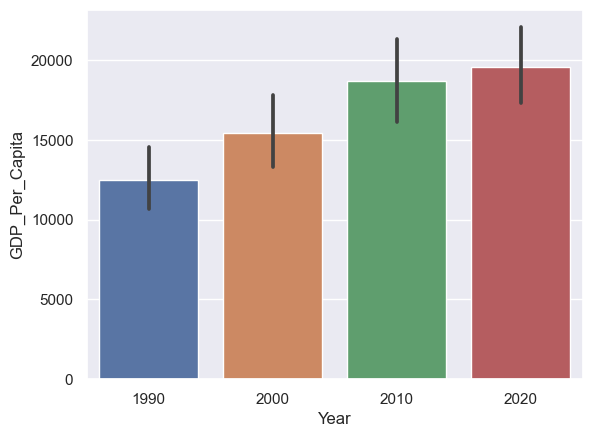

In [23]:
sns.barplot(data = gdp_decades, y = 'GDP_Per_Capita', x='Year');

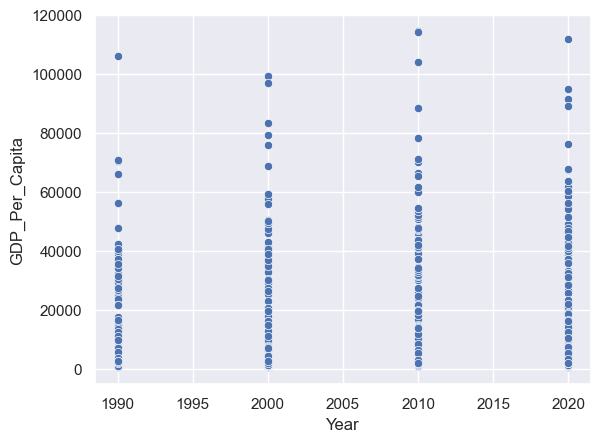

In [24]:
sns.scatterplot(data = gdp_decades, y = 'GDP_Per_Capita', x='Year');

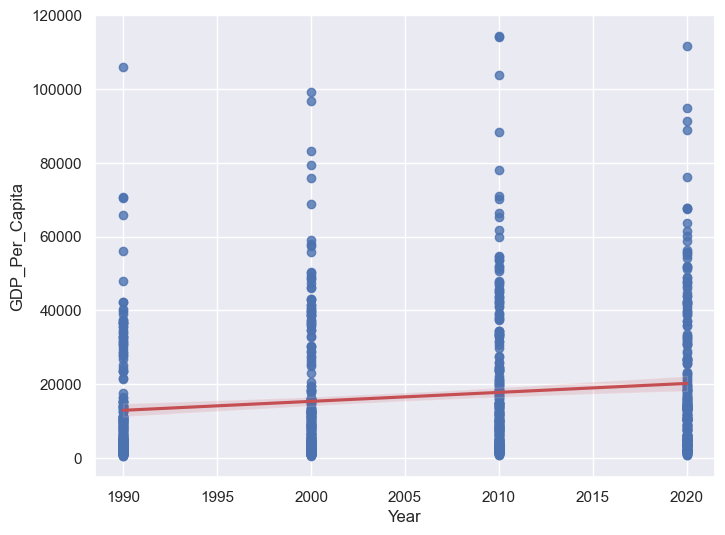

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "r"},
    ax=ax
)
plt.show()

 what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot

The GDP values over years and from 1990 to 2020 Gdp values are increasing by decade 2020 has Max GDP value,1990 has Min GDP value.  

11. Which country was the first to have a GDP per capita greater than $100,000?

In [26]:
countries_gdp = gdp_df.loc[gdp_df['GDP_Per_Capita']>= 100000]
countries_gdp

,Country,Year,GDP_Per_Capita
3277,Ireland,2022,113870.785550
3278,Ireland,2021,102785.490239
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563


12.Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset

In [27]:
gdp_df.max()

Country                Zimbabwe
Year                       2022
GDP_Per_Capita    157602.482546
dtype: object

In [28]:
gdp_df.describe()

,Year,GDP_Per_Capita
count,7662.000000,7662.000000
mean,2006.388280,17206.979219
std,9.418727,19363.258695
min,1990.000000,436.376416
25%,1998.000000,3655.268993
50%,2007.000000,10132.449293
75%,2015.000000,24119.515045
max,2022.000000,157602.482546


In [29]:
countries_high_gdp_2020 = gdp_df.loc[gdp_df['Year']==2020]
countries_high_gdp_2020

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


In [30]:
countries_high_gdp_2020.sort_values('GDP_Per_Capita',ascending=False)


,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751
6108,Singapore,2020,94910.101431
3279,Ireland,2020,91356.855054
5746,Qatar,2020,89019.069857
681,Bermuda,2020,76117.804744
...,...,...,...
5074,Niger,2020,1214.546556
6273,Somalia,2020,1127.418534
1630,Dem. Rep. Congo,2020,1044.071214
1217,Central African Republic,2020,847.765012


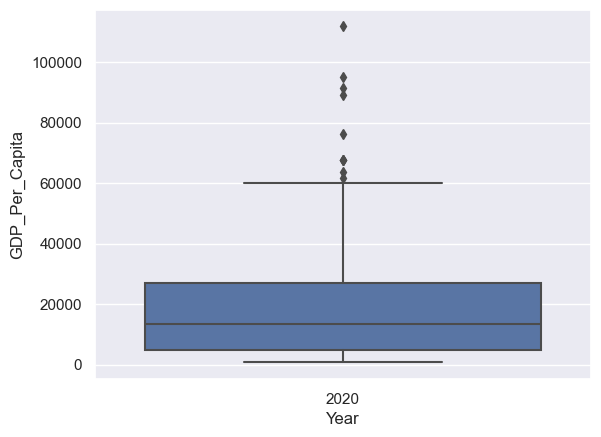

In [31]:
sns.boxplot(data = countries_high_gdp_2020, y = 'GDP_Per_Capita', x='Year');

C:\Users\TitanUp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


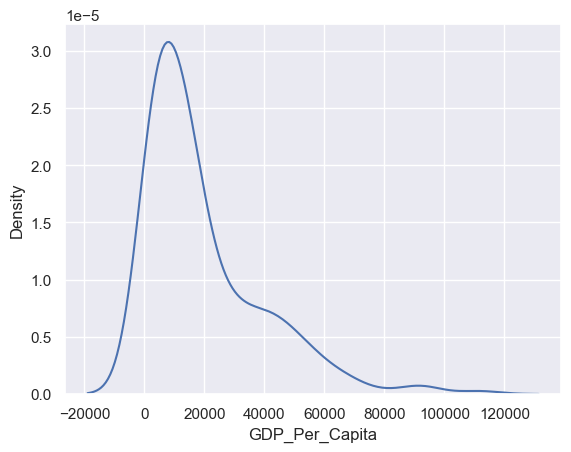

In [32]:
sns.kdeplot( countries_high_gdp_2020['GDP_Per_Capita']);

**Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [33]:
internet_use= pd.read_csv('../data/internet_use.csv',nrows=6083)

In [34]:
internet_use

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [35]:
internet_use = internet_use.drop(columns = ['Value Footnotes'])

In [36]:
internet_use = internet_use.rename(columns = {'Country or Area': 'Country', 'Year': 'Year','Value' :'Internet_Users_Pct'})
internet_use.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


16. Look at the number of observations in this dataset per year. What do you notice?

In [37]:
observations = internet_use.value_counts()
observations

Country      Year  Internet_Users_Pct
Afghanistan  1990  0.0000                1
Nicaragua    2009  7.3000                1
             2018  37.6000               1
             2017  30.4000               1
             2016  24.5718               1
                                        ..
France       2013  81.9198               1
             2012  81.4400               1
             2011  77.8200               1
             2010  77.2800               1
Zimbabwe     2022  32.5615               1
Name: count, Length: 6083, dtype: int64

17. What is the first year to have a non-zero internet users percentage value?

In [38]:
ANSWER:1990

In [39]:
internet_non_zero=internet_use.loc[internet_use['Internet_Users_Pct']!=0]
internet_non_zero

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6077,Zimbabwe,1998,0.081648
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684


In [40]:
internet_non_zero= internet_use.value_counts(normalize=True)
internet_non_zero.head()

Country      Year  Internet_Users_Pct
Afghanistan  1990  0.0000                0.000164
Nicaragua    2009  7.3000                0.000164
             2018  37.6000               0.000164
             2017  30.4000               0.000164
             2016  24.5718               0.000164
Name: proportion, dtype: float64

18. How does the distribution of internet users percent differ for 2000 and 2014?

In [41]:
my_list = [2000, 2014]
internet_users_percent = internet_use.loc[internet_use.Year.isin(my_list)]
internet_users_percent.shape

(414, 3)

In [42]:
internet_users_percent

,Country,Year,Internet_Users_Pct
5,Afghanistan,2014,7.000000
28,Albania,2014,54.300000
42,Albania,2000,0.114097
57,Algeria,2014,29.500000
71,Algeria,2000,0.491706
...,...,...,...
6017,Yemen,2000,0.082500
6031,Zambia,2014,6.500000
6045,Zambia,2000,0.191072
6061,Zimbabwe,2014,16.364700


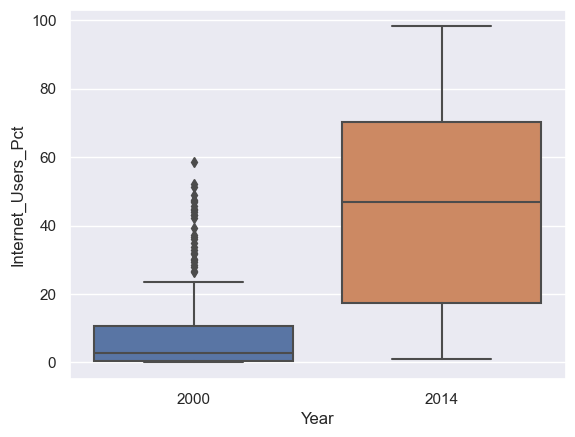

In [43]:
sns.boxplot(data = internet_users_percent, y = 'Internet_Users_Pct', x='Year');

19. For how many countries was the percentage of internet users below 5% in 2014?

In [44]:
user_percentage = internet_use.loc[internet_use['Year'] == 2014]
user_percentage


,Country,Year,Internet_Users_Pct
5,Afghanistan,2014,7.0000
28,Albania,2014,54.3000
57,Algeria,2014,29.5000
87,Andorra,2014,86.1000
114,Angola,2014,21.3623
...,...,...,...
5937,Viet Nam,2014,41.0000
5960,Virgin Islands (US),2014,50.0700
6003,Yemen,2014,22.5500
6031,Zambia,2014,6.5000


In [50]:
countries_5_low = user_percentage.loc[user_percentage['Internet_Users_Pct'] < 5]
countries_5_low

,Country,Year,Internet_Users_Pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


20.Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [51]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [52]:
internet_use

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [56]:
gdp_and_internet_use = pd.merge(gdp_df,internet_use,
                                left_on = 'Year', right_on = 'Year',
                                how = 'inner')
gdp_and_internet_use.head()


,Country_x,Year,GDP_Per_Capita,Country_y,Internet_Users_Pct
0,Afghanistan,2021,1517.016266,Albania,79.3237
1,Afghanistan,2021,1517.016266,Algeria,66.2356
2,Afghanistan,2021,1517.016266,Andorra,93.8975
3,Afghanistan,2021,1517.016266,Angola,37.8067
4,Afghanistan,2021,1517.016266,Antigua and Barbuda,87.0740


In [57]:
gdp_and_internet_use.tail()

,Country_x,Year,GDP_Per_Capita,Country_y,Internet_Users_Pct
1422380,Zimbabwe,1990,2704.757299,Virgin Islands (US),0.0
1422381,Zimbabwe,1990,2704.757299,Wallis and Futuna,0.0
1422382,Zimbabwe,1990,2704.757299,Yemen,0.0
1422383,Zimbabwe,1990,2704.757299,Zambia,0.0
1422384,Zimbabwe,1990,2704.757299,Zimbabwe,0.0


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) 